Example notebook for using CMBBEST

In [14]:
import numpy as np

import cmbbest as best

basis = best.Basis("Legendre", mode_p_max=30, polarisation_on=True, k_grid_size=50, quadrature_type="uniform")
#basis = best.Basis("Legendre", mode_p_max=10, polarisation_on=True, k_grid_size=70, quadrature_type="tetraquad")
#basis = best.Basis("Monomial", mode_p_max=4, polarisation_on=True, k_grid_size=70, quadrature_type="tetraquad")
#basis = best.Basis("Monomial", mode_p_max=4, polarisation_on=False, k_grid_size=200)

print(basis.data_path)


shapes = ["local", "equilateral", "orthogonal"]
n_s, A_s = basis.parameter_n_scalar, basis.parameter_A_scalar
print(n_s, A_s)

#A_s /= 2 * (np.pi ** 2) * (3/5)**(1.5)
#basis.parameter_A_scalar = A_s

#models = [best.Model(shape) for shape in shapes]
models = [best.Model(shape, parameter_n_scalar=n_s, parameter_A_scalar=A_s) for shape in shapes]

 

Using orthog. coefficients [ 0.00826957 -0.0182839   0.0248376  -0.0294743   0.0328145  -0.0352048
  0.036869   -0.037964    0.0386058  -0.0388835   0.0388669  -0.0386121
  0.0381646  -0.0375618   0.0368347  -0.036009    0.0351064  -0.034145
  0.0331402  -0.0321047   0.0310495  -0.0299836   0.0289147  -0.0278493
  0.0267927  -0.0257493   0.0247229  -0.0237165   0.0227324 ]
Using normalisation [0.01178441 1.41421356 0.81649658 0.63245553 0.53452248 0.47140452
 0.42640143 0.39223227 0.36514837 0.34299717 0.32444284 0.3086067
 0.29488391 0.28284271 0.27216553 0.26261287 0.25400025 0.24618298
 0.23904572 0.23249528 0.22645541 0.22086305 0.21566555 0.21081851
 0.20628425 0.20203051 0.19802951 0.19425717 0.19069252 0.18731716]
Gamma and beta data loaded
Using uniform grid
Tetrapyd grid set up
1D mode functions evaluated
Starting mode bispectra evaluations
...done
3D mode bispectra and covariance evaluated
Legendre Basis is now ready
legendre/hires/TP
0.9660499 2.2113348329940223e-09


In [4]:
coeff, shape_cov, conv_corr, conv_MSE = basis.modal_decomposition(models, check_convergence=True)
gamma = basis.gamma
f_sky = basis.parameter_f_sky
fisher_matrix = np.matmul(coeff, np.matmul(coeff, gamma).T) * f_sky / 6.

Shape #1/3 decomposed using CG with exit code 100000
Shape #2/3 decomposed using CG with exit code 100000
Shape #3/3 decomposed using CG with exit code 100000
Decomposition complete.


In [5]:
def cov_to_corr(A):
    norm = np.sqrt(np.diag(A))
    return A / (norm[:,np.newaxis] * norm[np.newaxis,:])

inv_fisher_matrix = np.linalg.inv(fisher_matrix)
print(fisher_matrix)
print(inv_fisher_matrix)
print(cov_to_corr(fisher_matrix))
print(cov_to_corr(inv_fisher_matrix))

[[ 9.75217593e-07 -9.67703638e-08 -5.61161721e-07]
 [-9.67703638e-08  1.00923814e-07  3.53912721e-07]
 [-5.61161721e-07  3.53912721e-07  1.41323988e-06]]
[[ 1.67603711e+06 -5.96537171e+06  2.15939902e+06]
 [-5.96537171e+06  1.02567962e+08 -2.80544339e+07]
 [ 2.15939902e+06 -2.80544339e+07  8.59061037e+06]]
[[ 1.         -0.30845711 -0.47800158]
 [-0.30845711  1.          0.9371118 ]
 [-0.47800158  0.9371118   1.        ]]
[[ 1.         -0.45497741  0.56908754]
 [-0.45497741  1.         -0.94511278]
 [ 0.56908754 -0.94511278  1.        ]]


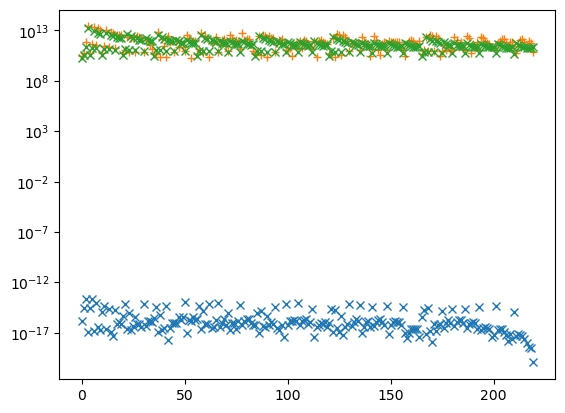

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.abs(coeff[0,:]), 'x')
plt.plot(np.abs(basis.beta[0,:]), '+')
plt.plot(np.sqrt(np.diag(basis.gamma)), 'x')
#plt.plot(np.abs(coeff[0,:]/basis.beta[0,:]), '+')
plt.yscale('log')


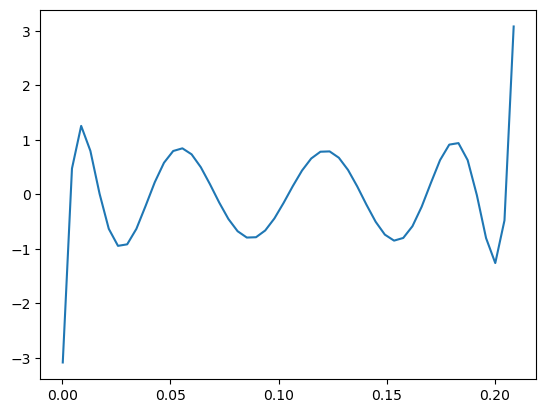

In [13]:
plt.plot(basis.k_grid, basis.mode_function_evaluations[10,:])


In [15]:
df = basis.constrain_models(models)

Shape #1/3 decomposed using CG with exit code 100000
Shape #2/3 decomposed using CG with exit code 100000
Shape #3/3 decomposed using CG with exit code 100000
Decomposition complete.


In [16]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.000018,3.319193e-10,0.998881,1.916282,1.865186,1.100708,-0.328612,4.921096,2.137093,1.014032
1,equilateral,1.0,0.000029,8.163137e-10,-24.098568,41.089324,42.863973,1.590270,-18.478291,1712.419896,43.946569,3.854093
2,orthogonal,1.0,0.000046,2.140990e-09,-22.655539,17.843630,18.562299,-6.432132,-23.268043,429.613080,21.507838,-1.873755


In [3]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.0,0.0,-38.704013,35.831798,35.231091,11.397303,-50.248494,1516.649544,36.526975,11.496408
1,equilateral,1.0,0.0,0.0,-33.138018,229.403275,216.424475,-3.972554,-29.319599,64197.387683,254.447890,-37.252015
2,orthogonal,1.0,0.0,0.0,-33.909447,70.452962,63.883703,-12.572637,-72.146244,6303.834465,72.315192,-9.076478


In [13]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.000002,3.145619e-12,4.388150,4.686277,5.072106,9.103531e-05,1.095844,31.518127,5.960015,0.000126
1,equilateral,1.0,0.000026,6.851685e-10,-22.484211,45.349396,49.236491,-4.367675e-07,-32.636107,2238.084424,50.577544,-0.000295
2,orthogonal,1.0,0.000005,2.111710e-11,-40.412186,21.627721,23.612644,-3.140465e-05,-39.256965,623.975388,27.081351,0.000246


In [10]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,2.107342e-08,5.004985e-16,2.565545,7.946298,8.575920,1.957676,-17.736198,356.609089,17.817954,1.529048
1,equilateral,1.0,NaN,-4.433887e-16,2.077924,85.408603,86.823315,-0.033284,6.314426,9116.889175,87.438324,-10.211737
2,orthogonal,1.0,2.980232e-08,9.004121e-16,-21.452098,25.393086,26.443500,-6.377491,-71.586001,3321.279507,53.631707,-2.972509


In [7]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.0,0.000000e+00,4.776663,5.372115,4.447293,0.537635,2.217396,37.700314,4.146922,0.194239
1,equilateral,1.0,0.0,0.000000e+00,25.455680,84.852286,90.176632,-1.577275,-0.136779,7791.973684,89.401865,-5.122197
2,orthogonal,1.0,NaN,-2.238062e-16,-29.642939,23.616251,25.063195,-4.376485,-25.313274,698.637140,25.600826,-4.250881


In [49]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,0.999999,0.001459,0.000002,4.331019,4.678523,5.059094,0.000091,0.014223,30.242961,5.834899,0.000121
1,equilateral,0.999863,0.016539,0.000274,-3.691176,35.875534,40.945958,-0.000005,-14.388520,1368.044390,41.806844,-0.000174
2,orthogonal,0.999986,0.005285,0.000028,-42.698822,21.397806,23.382894,-0.000030,-43.910428,608.475680,26.497858,0.000231


In [6]:
#A_s = 1.5714e-8

local_trio = np.zeros(20)
local_trio[10] = 6 * A_s ** 2
equil_trio = np.zeros(20)
equil_trio[10] = -3 * 6 * A_s ** 2
equil_trio[3] = -2 * 6 * A_s ** 2
equil_trio[5] = 6 * 6 * A_s ** 2
ortho_trio = np.zeros(20)
ortho_trio[10] = -9 * 6 * A_s ** 2
ortho_trio[3] = -8 * 6 * A_s ** 2
ortho_trio[5] = 18 * 6 * A_s ** 2


#fact = (2 * np.pi ** 2) ** 2 * (3 / 5)
#fact = 1/fact

#df2 = basis.constrain_models([models[0]], decomposition_coefficients=a.reshape(1,len(a)))
df2 = basis.constrain_models(models, decomposition_coefficients=np.vstack([local_trio, equil_trio, ortho_trio]))

In [7]:
df2

,shape_type,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,4.387045,4.686296,5.071914,9.103621e-05,0.977174,31.553260,5.943432,0.000126
1,equilateral,-21.959800,45.352353,49.309766,-4.992321e-07,-31.905555,2238.768305,50.638590,-0.000296
2,orthogonal,-41.067396,21.648704,23.650883,-3.142075e-05,-40.142566,625.783826,27.059637,0.000247


In [8]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,1.349358e-07,1.831467e-14,4.380281,4.686314,5.070589,9.103742e-05,0.967427,31.552852,5.941457,0.000126
1,equilateral,1.0,3.942477e-08,1.536854e-15,-21.959708,45.352352,49.309776,-4.992396e-07,-31.882922,2238.741746,50.639855,-0.000296
2,orthogonal,1.0,NaN,-2.626638e-13,-41.067378,21.648704,23.650883,-3.142076e-05,-40.164076,625.777360,27.057443,0.000247


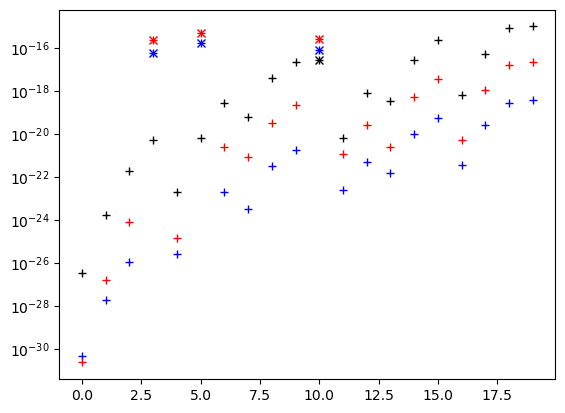

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.abs(coeff[0,:]), 'k+')
plt.plot(np.abs(local_trio), 'kx')
plt.plot(np.abs(coeff[1,:]), 'b+')
plt.plot(np.abs(equil_trio), 'bx')
plt.plot(np.abs(coeff[2,:]), 'r+')
plt.plot(np.abs(ortho_trio), 'rx')
plt.yscale("log")

In [2]:
k1, k2, k3 = basis.tetrapyd_grid
w = basis.tetrapyd_grid_weights
S = np.stack([model.shape_function(k1, k2 ,k3) for model in models])
shape_covariance = np.matmul(S * w[np.newaxis,:], S.T)

In [3]:
basis.compute_QS_cython(S)

QS Function start!
mode evals declared
mode p1,2,3s declared
Loop starts


array([[ 5.96553321e-23,  5.01178484e-21,  2.26867285e-18,
         1.37514221e-17, -1.10797384e-22,  7.38776279e-19,
         6.53788247e-18,  7.42457953e-19,  3.80079987e-18,
        -1.83271599e-18,  5.68083328e-25, -1.18612845e-20,
         1.15281293e-18,  2.90843672e-19,  2.10354080e-18,
        -8.70971798e-19,  4.40549522e-19,  1.51445204e-18,
        -1.03222240e-18,  6.22271649e-19,  7.29854127e-24,
        -5.90409003e-21, -3.97800900e-21, -9.22402669e-21,
         4.30540971e-19,  2.04586792e-20,  1.83888957e-19,
         1.13046636e-18, -5.78369399e-19,  1.75166984e-19,
         3.11562551e-19,  8.13619607e-19, -6.47062173e-19,
         4.62184991e-19, -2.90584763e-19, -2.93916318e-23,
        -7.21690682e-21,  2.03969047e-20, -6.31325583e-21,
         5.55150662e-21,  7.21820263e-20, -8.27228253e-21,
         2.50531858e-19, -8.13057319e-21, -7.87731130e-20,
         1.35462418e-19,  7.18089344e-19, -4.12176031e-19,
         1.64092817e-19, -6.49951595e-20,  2.42796894e-1

In [4]:
def cov_to_corr(cov):
    norm = np.sqrt(np.diag(cov))
    return cov / norm[:,np.newaxis] / norm[np.newaxis,:]

shape_corr = cov_to_corr(shape_covariance)

In [5]:
print(shape_corr)

[[ 1.          0.10795815 -0.1729277 ]
 [ 0.10795815  1.          0.18530889]
 [-0.1729277   0.18530889  1.        ]]


In [6]:
basis.mode_bispectra_covariance

array([[ 3.63457720e-08,  2.70159116e-08,  2.05811957e-08, ...,
         1.49058020e-08, -1.49048640e-08,  1.49042082e-08],
       [ 2.70159116e-08,  2.05826981e-08,  4.08376774e-08, ...,
         1.20225593e-08, -1.19555528e-08,  1.19401228e-08],
       [ 2.05811957e-08,  4.08376774e-08,  5.19798446e-06, ...,
         1.90138110e-07, -1.78129524e-07,  1.81760816e-07],
       ...,
       [ 1.49058020e-08,  1.20225593e-08,  1.90138110e-07, ...,
         1.21909923e-06, -1.72811631e-07, -4.35486002e-07],
       [-1.49048640e-08, -1.19555528e-08, -1.78129524e-07, ...,
        -1.72811631e-07,  1.07992727e-06, -1.39543612e-07],
       [ 1.49042082e-08,  1.19401228e-08,  1.81760816e-07, ...,
        -4.35486002e-07, -1.39543612e-07,  9.54700997e-07]])

In [3]:
basis.compute_mode_bispectra_covariance2()

Function start!
mode evals declared
Loop starts


AssertionError: 

In [16]:
#basis.mode_function_evaluations.flags
basis.mode_bispectra_covariance.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [3]:
basis.tetrapyd_grid_size

2600

In [17]:
basis.compute_tetrapyd_grid_weights()

array([2.72238270e-08, 2.58068491e-07, 3.52608065e-07, ...,
       2.78932653e-07, 2.78932653e-07, 4.64887755e-08])

In [9]:
%timeit basis.compute_tetrapyd_grid_weights(MC_N_SAMPLES=10000)

86.3 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit basis.old_compute_tetrapyd_grid_weights(MC_N_SAMPLES=100000)

2.19 s ± 166 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
df = basis.constrain_models(models)

QS Function start!
mode evals declared
mode p1,2,3s declared
Loop starts
Shape #1/3 decomposed using CG with exit code 0
Shape #2/3 decomposed using CG with exit code 2200
Shape #3/3 decomposed using CG with exit code 2200
Decomposition complete.


AttributeError: 'Basis' object has no attribute 'beta'

In [ ]:
df

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.000355,1.261123e-07,-0.629391,4.002554,4.167870,4.094516,-3.347327,21.651810,4.666821,4.585109
1,equilateral,1.0,0.000263,6.904507e-08,-22.309071,43.580980,46.958502,-0.281699,-19.168942,2039.442565,47.573938,-12.850795
2,orthogonal,1.0,0.000430,1.848196e-07,-27.216663,20.855076,22.845111,-8.364998,-35.998220,552.230096,25.322098,2.095576


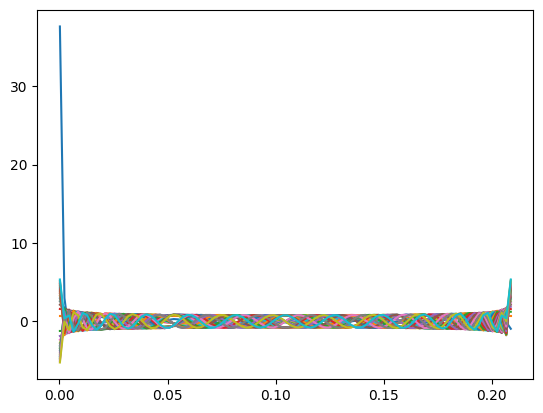

In [4]:
import matplotlib.pyplot as plt

k_grid = basis.k_grid
evals = basis.mode_function_evaluations
for p in range(basis.mode_p_max):
    plt.plot(k_grid, evals[p,:])
#plt.scatter(k_grid, evals[0,:])

2.54791601880517e-06
0.004543882128662626
0.004535258985962223


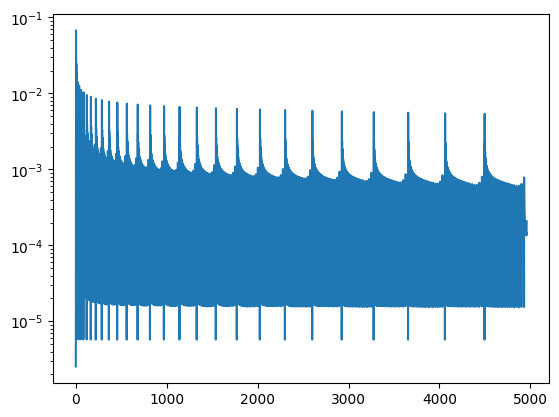

In [14]:
plt.plot(basis.mode_bispectra_norms)
plt.yscale("log")
np.argmin(basis.mode_bispectra_norms)
print(basis.mode_bispectra_norms[0])


8.567595886699627e-10
0.004543882128662626
0.004535258985962223


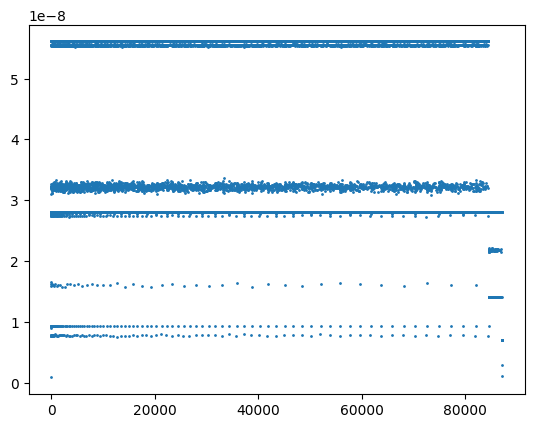

In [22]:
plt.scatter(np.arange(basis.tetrapyd_grid_size), basis.tetrapyd_grid_weights, s=1)
print(np.min(basis.tetrapyd_grid_weights))
print(np.sum(basis.tetrapyd_grid_weights))
print((basis.mode_k_max - basis.mode_k_min) ** 3 / 2)

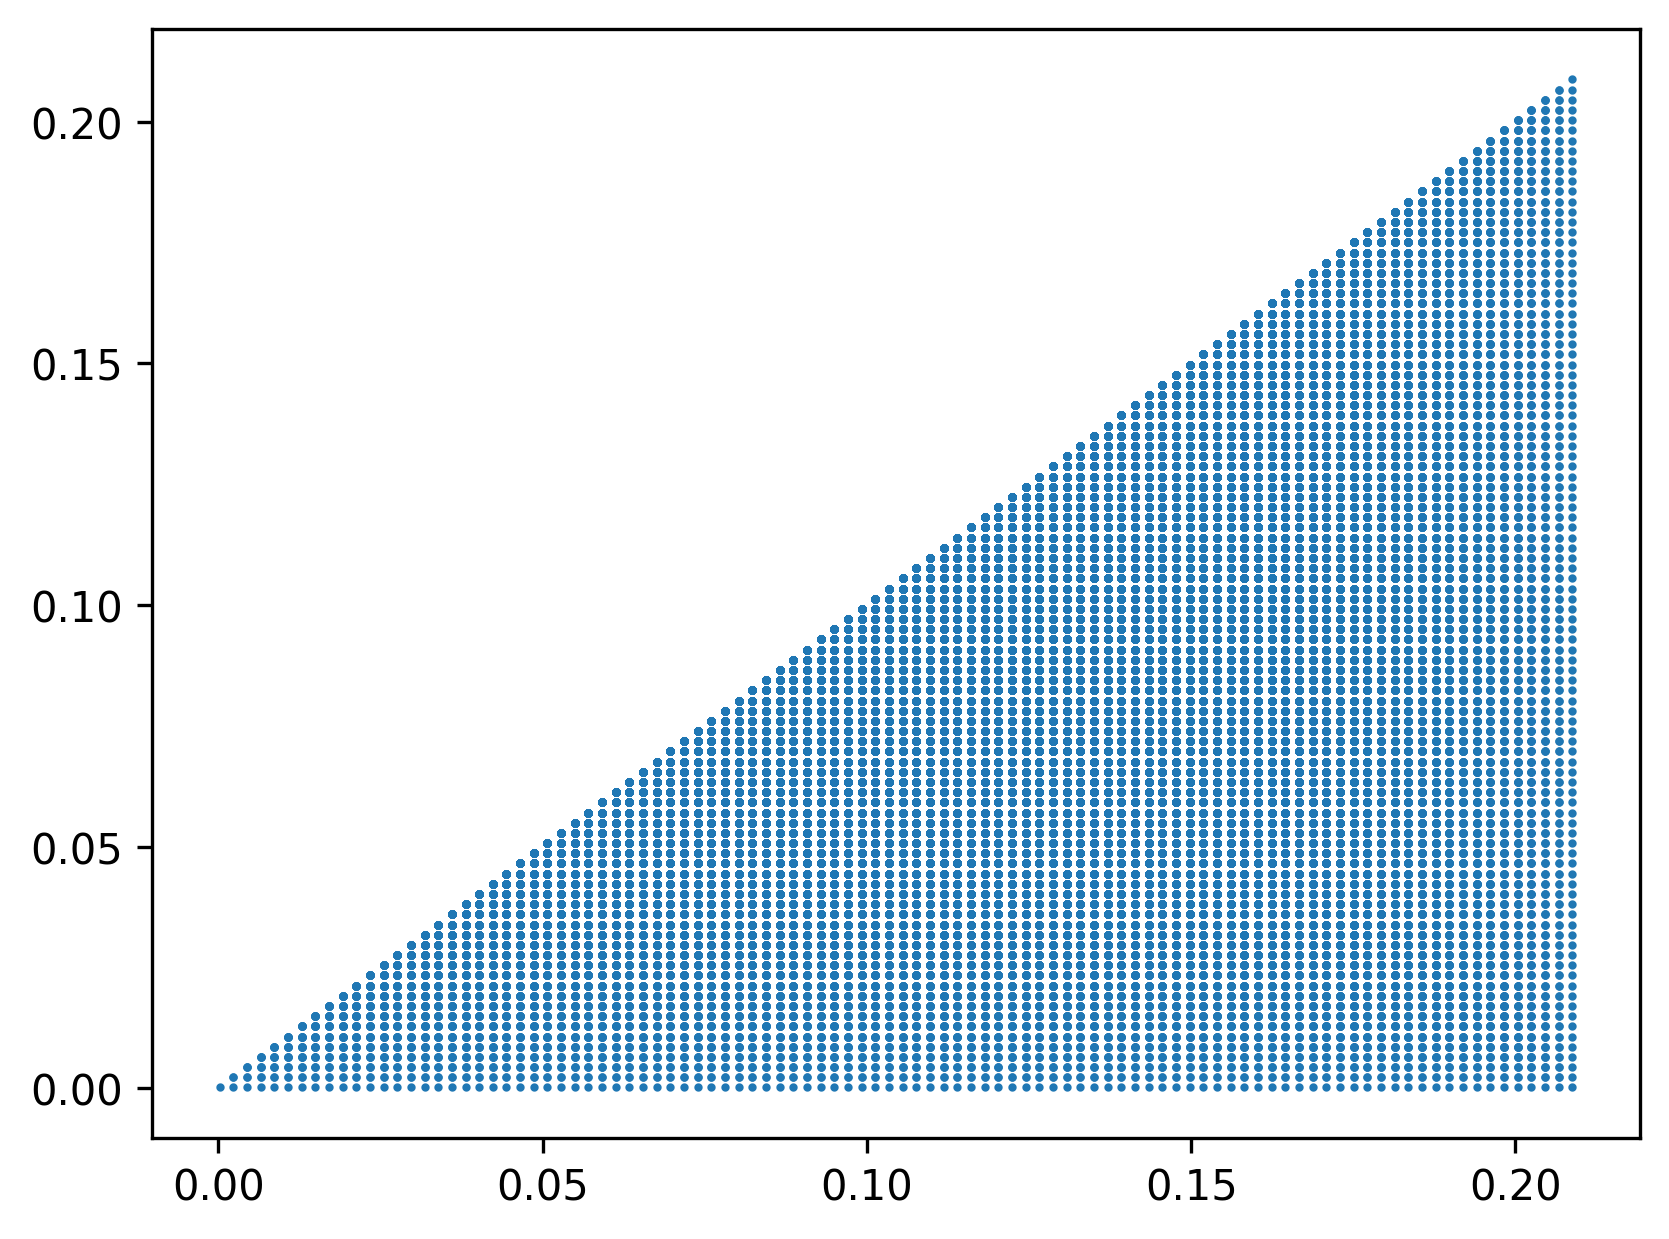

In [28]:
k1, k2, k3 = basis.tetrapyd_grid
plt.figure(dpi=300)
#plt.scatter(k1, k2, s=1)
#plt.scatter(k1, k3, s=1)
plt.scatter(k2, k3, s=1)


In [3]:
decomposition_coefficients, shape_covariance, convergence_correlation, convergence_MSE = basis.modal_decomposition(models)

,shape_type,convergence_correlation,convergence_epsilon,convergence_MSE,single_f_NL,single_fisher_sigma,single_sample_sigma,single_LISW_bias,marginal_f_NL,marginal_fisher_sigma,marginal_sample_sigma,marginal_LISW_bias
0,local,1.0,0.000375,1.408445e-07,0.252588,0.052882,0.659564,0.010372,0.311425,0.003403,0.752546,0.054533
1,equilateral,1.0,0.000262,6.844980e-08,-1.105551,2.633627,36.951144,3.811745,100.915337,76.412921,110.232271,21.229596
2,orthogonal,1.0,0.000442,1.954716e-07,-2.986779,0.763702,10.886853,0.595691,-29.075562,6.260635,32.415473,-4.955298


In [13]:
import cmbbest

nodes, weights = cmbbest.gauss_legendre_quadrature(10)

AttributeError: module 'cmbbest' has no attribute 'gauss_legendre_quadrature'